# Air Pollution
## MATH 4779 - Math Clinic
## University of Colorado Denver
### Julianna Bernath, Nicholas Vincent, Dianelys Gonzalez Alvarez
### Advisor: Jan Mandel
### December 8th, 2021

##Abstract

Air pollution impacts communities across the globe as it's spreading rapidly while causing harmful effects. The use of models such as WRF allows predicting air quality changes and the accuracy of this data by comparing it with the MesoWest project that provides information about the different weather stations in the United States. By researching the available weather observations, we compare the precision of the data between WRF and the weather stations.


#Table of Contents



**1 Introduction**




**2 Background**





**3 Methods**

3.1 Libraries

3.1.1 Main Libraries

3.1.2 WRF link

3.1.3 Variety of Python Packages and Modules

3.2 Mesopy

3.2.1 Bounding Box

3.2.2 Time translation for Start and end

3.2.3 Creating Mesopy Objects

3.2.4 Creating Station List

3.3 Comparing One Station to WRF Postion

3.3.1 Bilinear Interoplation 

3.3.2 Testing Interpolation

3.3.3 Picking a Station to Interpolate 

3.3.4 Polynomial modeling

3.4 Data cleaning

3.5 Statistics Functions

3.5.1 Basic statistical summary for station observations

3.6 Comparison and Analysis

3.6.1 Useful functions for comparison

3.6.2 Preparing Plots and combining functions for ease of use

**4 Results**

4.1 Comparing Time and  $PM_{2.5}$  in Station

4.1.1 Ogden Station

4.1.2 Boundiful Viewmont Station

4.1.3 U of U William Browning Building Station

4.2 Comparing Time and  PM2.5  in WRF

**5 Conclusion**

5.1 Contributions of Authors

5.2 Acknowledgements

5.3 References

#1 Introduction

WRF is a stimulation model system that predicts a variety of variables for wildfires. The goal of this notebook is to take one variable that measures air pollution: PM2.5 concentration, which is  2.5 micrometer or smaller from WRF; and compare it to real station data at similar locations and time. Using mesowest API we are able to collect data from mesowest's database that contains PM2.5 concentrations from hundreds of weather stations across the western United States over many years. After carefully obtaining and cleaning this data, we use it to compare forecasted concentrations from WRF, using both graphical comparison and statistical comparisons over both space and time.
The tools and software used to complete this analysis will be explained, as well as providing numerical and graphical summaries. The goal is to deliver sufficient background information for users and is designed for users to enter their own WRF data to compare to station observations.






#2 Backgroud

Weather Reseaching and Forecasting Model (WRF) and WRF-SFIRE, a wildland fire simulation,are simulation model systems that are used both operationally and in a reseach capacity. WRF and WRF-SFIRE can forecast a variety of variables for wildfires and weather over a given time and region. The model is complex with numerous inputs and outputs but for this project we are only concered with air pollution. More specifically, pm2.5 concentration, or air pollutants less than or equal to 2.5 micrometers. Air pollution is a serious problem, not only because it can affect other aspect of the WRF model and it accuracy, but also is a danger to human health. The WRF and WRF-SFIRE models go through various testing on a case by case basis to learn more about the accuracy of the models.With this notebook, we offer a tool for inputing WRF netcdf output and then having the ability to see the difference between WRF forecasted values and a station's observation included in the forecast region over the time region.  To improve models, it must be known what is the problem with the current model and this notebook may provide insights. Previous studies have found that $PM_{2.5}$ conceration have been underestimates but also doens't have similar peaks (Konchanski, 540). We however wanted to create tool so $PM_{2.5}$ can be remeasure with any new model that is used. 

#3 Methods 

## 3.1 Libraries 

###3.1.1 Main Libraries 

The Main libraries are wrf-python and mesopy. WRF-python is based on the WRF fire stimulation; WRF python can access all of the functions that WRF might use, along with help read documents. 



Mesopy however, was created to be able to pull a back log of data from weather stations. Mesopy can be used for  $PM_{2.5}$ concentrations, such as temperature or moisture. 

We also use other libraries, such as numpy, matplotlib, and netCDF4. The library netCDF4 is very important, since cdf is the format that WRF holds its data.

In [ ]:
!pip install wrf-python
!pip install MesoPy
!pip install matplotlib

     |████████████████████████████████| 1.1 MB 10.6 MB/s 
  Created wheel for wrf-python: filename=wrf_python-1.3.1-cp37-cp37m-linux_x86_64.whl size=592941 sha256=51c02673353912ae689b24f4ceec924543dfe40dc8d79b60d0ef30d463d6a805
  Stored in directory: /root/.cache/pip/wheels/3c/48/02/2482e25eeae0516f5c2acf97fb74b9241dfab0ed61f7dd0708
Successfully built wrf-python
  Created wheel for MesoPy: filename=MesoPy-2.0.3-py3-none-any.whl size=7792 sha256=2f508995698ec4a1721f31d45399451e85a14bc13cad89098d9f13b2fd0e594b
  Stored in directory: /root/.cache/pip/wheels/53/08/18/c50a32a8845ad0083fe4a45f2c445e8025e6d11af89184357f
Successfully built MesoPy


### 3.1.2 WRF link

In order to use another WRF cdf file, replace the link for the one you would like. The stations are pulled based on the wrf file so no further work is needed.

In [ ]:
! wget --no-clobber --output-document=wrf.nc https://home.chpc.utah.edu/~u0703457/people_share/jan/simulation_canopy/wrfout_d01_2018-09-16_00:00:00

--2021-12-14 00:29:29--  https://home.chpc.utah.edu/~u0703457/people_share/jan/simulation_canopy/wrfout_d01_2018-09-16_00:00:00
Resolving home.chpc.utah.edu (home.chpc.utah.edu)... 155.101.19.106, 2001:1948:414:13::106
Connecting to home.chpc.utah.edu (home.chpc.utah.edu)|155.101.19.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 671132873 (640M)
Saving to: ‘wrf.nc’

wrf.nc              100%[===================>] 640.04M  18.2MB/s    in 42s     

2021-12-14 00:30:13 (15.2 MB/s) - ‘wrf.nc’ saved [671132873/671132873]



### 3.1.3 Variety of Python Packages and Modules
these include numpy, scipy, and pandas

In [ ]:
import numpy as np
import wrf
from MesoPy import Meso
from __future__ import print_function
import netCDF4 as nc4
from netCDF4 import Dataset
from wrf import getvar
import json
file = Dataset('wrf.nc')
from scipy.interpolate import LinearNDInterpolator, interpn
from scipy.optimize import root
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import scipy as sp
import statsmodels.api as sm
%matplotlib inline
import datetime
from datetime import timedelta
import codecs
import statistics
from sklearn.metrics import r2_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 3.2 Mesopy

Mesopy is a system of weather stations throughout the United States, which collects a backlog of data. Users are able to use the mesopy library package to pull data from weather stations for extended periods of time. With this Mesopy, we're able to give bounds of a WRF file and pull data for each weather station, including coordinates, names, date, and $𝑃𝑀2.5$ data.

###3.2.1 Bounding Box

Pulling the bound of the area from the WRF file and assigning it maxlats, minlats, maxlons, and minlons, in order to create the area to pull station data from. This might not be completely accurate to WRF data since is not a perfect grid like we are assuming, but it should be accurate enough for our purposes.

We further translated the bounding box from float to string since Mesopy only takes that format, so you need to further translate it.

In [ ]:
#getting bounding box
maxlats = np.amax(file.variables['XLAT'][:,:])
minlats = np.amin(file.variables['XLAT'][:,:])
maxlons = np.amax(file.variables['XLONG'][:,:])
minlons = np.amin(file.variables['XLONG'][:,:])

bound = np.str(minlons) + ', ' + np.str(minlats) + ', ' + np.str(maxlons)+ ', '+ np.str(maxlats)

###3.2.2 Time Translation for Start and End

Time start and end is based on WRF first and last time, translated into the string format yyyyMMddhhmm.

In [ ]:
# pulling time information from wrf file to feed to mesowest api
time = file.variables['Times'][:]

times = codecs.decode(time[0][:])
timee = codecs.decode(time[-1][:])

timestart= times[0:4] + times[5:7]+times[8:10]+times[11:13]+times[14:16]
timeend = timee[0:4] + timee[5:7]+timee[8:10]+timee[11:13]+timee[14:16]


###3.2.3 Creating Mesopy Objects

The mesopy object is all of the stations within the given parameter, the bounding box and start and end time. 

In [ ]:
#information from above for mesowest object
time_start = timestart  #format yyyyMMddhhmm 
time_end   = timeend #format yyyyMMddhhmm 

bounding_box = bound  #Found with wrf data, maxlats, minlats, maxlons, and minlons

meso_token="b40cb52cbdef43ef81329b84e8fd874f" 
m = Meso(meso_token)                  # create a Meso object
# ask the object for data from the weather station within the boudning box
meso_obss = m.timeseries(time_start, time_end, bbox=bounding_box, 
                         showemptystations = '0', vars='PM_25_concentration')    

###3.2.4 Creating Station List 

In order to reference the station data later in the notebook, we created a class list to get need variables like name, ID, state, time, latitude and longitude, $PM_{2.5}$ concerations. We also did some cleaning of the data, mostly deleting any station that doesn't have $PM_{2.5}$ concentrations in order to avoid errors later in the notebook.

In [ ]:
# for handling insufficient station data, i.e station doesnt have pm25 concentration.
#first create variable with all stations 
stations=meso_obss['STATION']
print('number of stations before adjustment',len(meso_obss['STATION']))

#test to see if station has pm25 concentration and if it doesn't notes station number
listrem = []
for i in range(len(meso_obss['STATION'])):
  try:
    len(meso_obss['STATION'][i]['OBSERVATIONS']['PM_25_concentration_set_1']) 
  except:
    listrem.append(i)

print('stations not included',listrem)

#since removing an item from a list, changes the index of all the other items, this helps that
p = 0
for i in listrem:
  stations.pop(i-p)
  p += 1

print('number of stations after adjustment',len(stations))

number of stations before adjustment 471
stations not included []
number of stations after adjustment 471


In [ ]:
#object for each station with associated name,lat,lon,datetime, pmconcentration,id,and state and some basic methods
class station:
    
    def __init__(self,name,latitude,longitude,date_time,pmconcentration,id,state ):
       
        self.name = name
        self.latitude = float(latitude)
        self.longitude = float(longitude)
        self.datetime = date_time
        self.pmconcentration = (pmconcentration)
        self.id = id
        self.state = state
      
    def stationinfo(self):
        return(self.name,self.id,self.state,self.latitude,self.longitude)
    
    def stationdata(self):
        return(self.name,self.datetime,self.pmconcentration)

In [ ]:
#creating a list of station objects
stationlist = []
for i in range(len(stations)):
  try:
    stationobj = station(stations[i]['NAME'],stations[i]['LATITUDE'],stations[i]['LONGITUDE'],stations[i]['OBSERVATIONS']['date_time'],stations[i]['OBSERVATIONS']['PM_25_concentration_set_1'],stations[i]['ID'],stations[i]['STATE'])
    stationlist.append(stationobj)
  except:
    print('station',i,'not included')

In [ ]:
#Getting pmcon for stations 
pmcon_sta = []
pmcon = []

for r in range(len(stationlist)):
  pm = stations[r]['OBSERVATIONS']['PM_25_concentration_set_1']
  pmcon.append(np.array(pm))
  

pmcon1 =[stationlist[i].pmconcentration for i in range(len(stationlist))]


pmcon_st=np.array(pmcon[0])

for w in range(len(pmcon_st)):
  if pmcon_st[w] != None:
    pmcon_sta.append(pmcon_st[w])



##3.3 Comparing one Station to WRF position 
WRF forecasted values are associated with an hourly average given at the center of a cell which is part of a bigger mesh. 
By using bilinear interpolation, we are able to take known WRF forecasted values surrounding a station location to estimate what the WRF value would be at that point within these four known forecasted values. This is essential becuase it is very unlikely a station is located at a center of a node. This does invite more difference into the comparison since we are making more estimates and must be noted.

###3.3.1 Bilinear Interoplation 

Bilinear Interpolation is an extension of linear interpolation but with two variables on a 2D grid. For billinear interpolation you first use linear interpolation in one direction and then again in the other direction. 

For our case, The four known points correspond the center of each cell for the WRF pm2.5 forecast. Since, it is very unlikely that a station location is one one of these grid points this is necessary to get forecasts at that point. 

\\
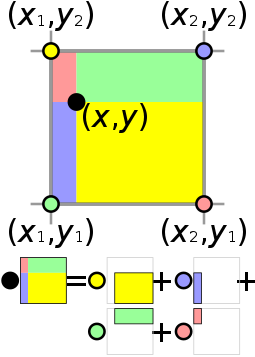
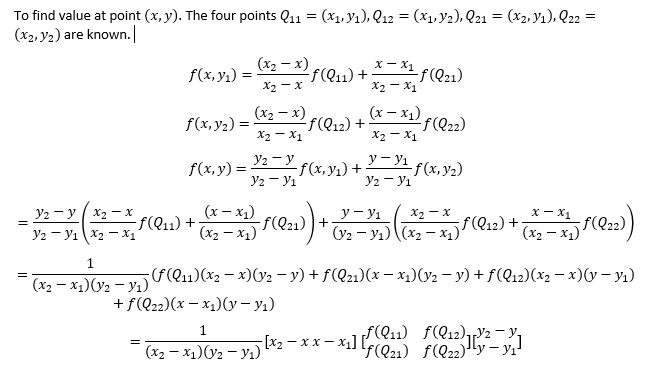



In [ ]:
#function for interpolation 
def interp_to_lat_lon_slow(lats,lons,v,lat,lon): 
    # on mesh with coordinates lats and lons interpolate v to given lat lon
    interp=LinearNDInterpolator(list(zip(lats.flatten(),lons.flatten())),v.flatten())
    return interp(lat,lon)

In [ ]:
# list of longitude and latitude cooridinates to interpolate to, these are pulled from MesoWest and stored within each station object
lat_sta = [stationlist[i].latitude for i in range(len(stationlist))]
lon_sta = [stationlist[i].longitude for i in range(len(stationlist))]

###3.3.2 Testing Interpolation


In order to show how well our interpolation works, we can give the function something we know the answer to. So we compared our interpolation output(black), which correlates a tr17_wrf tracer to each station. If our interpolation is correct, then it will lay well over the tr17_wrf(green).

In [ ]:
lats_wrf = file.variables['XLAT'][0,:,:]
lons_wrf = file.variables['XLONG'][0,:,:]
tr17_wrf = file.variables['tr17_1'][0,0,:,:]

lat_sta = []
lon_sta = []
p=30
for i in range(len(stationlist)):
  la = (stationlist[i].latitude)
  lat_sta.append(la)
for i in range(len(stationlist)):
  lo = (stationlist[i].longitude)
  lon_sta.append(lo)

data_test = interp_to_lat_lon_slow(lats_wrf,lons_wrf,tr17_wrf,lat_sta,lon_sta)


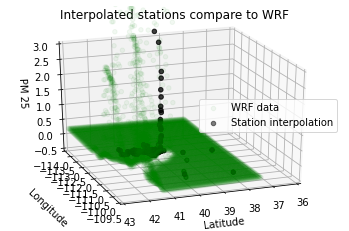

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d',)

ax.set_zlim3d(-.5, 3)
ax.set_xlim3d(36,43)
ax.set_ylim3d(-114,-109.5)
ax.scatter(lats_wrf,lons_wrf,tr17_wrf,c='green', marker='o', alpha=.05, label = 'WRF data')
ax.scatter(lat_sta,lon_sta,data_test,c='black', marker='o', alpha=.5, label = 'Station interpolation')
plt.xlabel("Latitude")
plt.ylabel("Longitude", labelpad=15)
ax.set_zlabel('PM 25')
plt.legend(loc="center right")
plt.title("Interpolated stations compare to WRF")
ax.view_init(25, 70)



###3.3.3 Picking a Station to Interpolate 

With the nameseachfun(), you are able to pick which stations you want to use to compare to WRF data. In order to use nameseachfun, enter the first output into the input bar. Names and index should be the same as the output.

In [ ]:
# finding index of station in stationlist by name
def namesearchfun():
  namesearch = input(str('enter name of station '))
  for i in range(len(stationlist)):
    if stationlist[i].name == namesearch:
      stationindex = i
  try:
    len(stationlist[stationindex].stationinfo())
    return stationindex
  except:
    print('station not found')

In [ ]:
###   !!!! only commetted out becuase I coulndt figure out the error
def compareWRFtoStation():

  p = namesearchfun()

  grid = np.fromfunction(lambda i, j: i, (110, 96), dtype=float)
  
  datax = interp_to_lat_lon_slow(lats_wrf,lons_wrf,grid,lat_sta[p],
                               lon_sta[p])

  datay = interp_to_lat_lon_slow(lats_wrf[int(datax+1),:],
                               lons_wrf[int(datax),:],grid[int(datax),:],
                               lat_sta[p],lon_sta[p])
  
  lats_wrf_fulltime = file.variables['XLAT'][:,:,:]
  lons_wrf_fulltime = file.variables['XLONG'][:,:,:]
  tr17_wrf_fulltime = file.variables['tr17_1'][:,0,:,:]
  name = stationlist[p].name

  pmwrf = tr17_wrf_fulltime[:,int(datax),int(datay)]
  plt.plot(time_sta,pmcon[p], label = "Station")
  plt.plot(time_wrf,pmwrf, label ="Wrf")
  plt.xticks(rotation = 45)
  plt.xlabel("Time mm/dd hh")
  plt.ylabel("PM 25")
  plt.title("Comparing " , name , " to Wrf")
  plt.legend(loc="upper right")

  print("WRF Statistic study: " + compareWRFtoStation_statistics(pmwrf))
  print("Station " , name, ": " ,compareWRFtoStation_statistics(pmcon[p]))

  compareWRFtoStation(pmwrf)

###3.3.4 Polynomial modeling 

In [ ]:
def poly_model():
  stationindex = namesearchfun()
  timelist1,pmconlist1 = hrly_time_pmcon(stationindex)
  x2 = [int(ele) for ele in timelist1]
  print(x2,pmconlist1)
  
  polymodel = np.poly1d(np.polyfit(x2, pmconlist1, 6))
  polyline = np.linspace(1, 24, 100)
  plt.scatter(x2,pmconlist1)
  plt.plot(polyline, polymodel(polyline))
  plt.title("Polynomial Fit")
  plt.xlabel('Time(in hours)')
  plt.ylabel('Pm2.5 concentration ($µg/m^3$)')
  plt.show()


## 3.4 Data Cleaning

Weather stations report at different time intervals from station to station. Also, sometimes stations fail to report or report their observations as None.
These functions attempt to clean that data.
Since WRF reports hourly, direct comparisons requires getting station observations that end on the hour. 

In [ ]:
#due to inconsistencies with station observation reporting, some values are missing and are being reported as None and therefore it needs to be cleaned
def pmcon_adj(stnidx):
  #take all pmconcentrations from station
  pmconlist = stationlist[stnidx].pmconcentration
  #take all time observations from station
  time_pmadj_all = stationlist[stnidx].datetime
  pmconadj =[]
  pmindex = []
  time_pmadj_all_list =[]
  #Test to see if the observation is a float, and if it is keep the observation while also documenting the index
  for idx,ele in enumerate(pmconlist):
    if type(ele) == float:
      pmconadj.append(ele)
      pmindex.append(idx)
  #using the index of the float observations to get the correct time associated with that observation
  for ele in pmindex:
    time_pmadj_all_list.append(time_pmadj_all[ele])
  #cleaned pmconcentrations with correct time
  return pmconadj,time_pmadj_all_list,pmindex


In [ ]:
# taking pmconcentrations of times that our hourly, 
#useful since wrf output is hourly
def hrly_time_pmcon(stationidx):
  pmconlist = []
  timlist = []
  #t,v,z = pmconadj,time_pmadj_all_list,pmindex from pmcon_adj
  t,v,z = pmcon_adj(stationidx)
  for i in range(len(t)):
    if v[i][11:13] and v[i][14:16] == '00':
      pmcon1 = t[i]
      timlist1 = v[i][11:13]
      pmconlist.append(pmcon1)
      timlist.append(timlist1)
  return timlist,pmconlist

## 3.5 Statistics functions

###3.5.1 function for providing basic statistical summary about Mesowest station pm2.5 observations

In [ ]:

def station_stats(stnidx):
  d,p,l = pmcon_adj(stnidx)
  stnname = stationlist[stnidx].name
  mean = round(np.mean(d),2)
  std_dev = round(np.std(d),2)
  median= round(np.median(d),2) 
  max = np.max(d)
  min = np.min(d)
  zz = {'index':l[0:1],
      'station name':stnname,
        'station index':stnidx,
        '# observations before adjustment':len(stationlist[stnidx].pmconcentration),
        '# observations after adjustment':len(d),
        'mean':mean,
        'std deviation':std_dev,
        'median':median,
        'max':max,
        'min':min,
        }

  df2=pd.DataFrame(zz)
  print('station name',stnname)
  print('Number of observations before adjustment',len(stationlist[stnidx].pmconcentration))
  print('Number of pm observations after adjusting for missing data ',len(d))
  print()
  print('Numerical summary')
  print('Pm Concentration mean =',mean)
  print('Max pm concentration',max)
  print('Minimum pm concentration',min)
  print('Pm2.5 observations standard deviation',std_dev)
  print('Pm2.5 observations median',median)
  display(df2)

In [ ]:
def compareWRFtoStation_statistics(stationdata):

  # average Pm values 
  mean = np.mean(stationdata)
  print('Mean: ' , mean)

  #how far from the mean individual observations are in our data 
  variance=np.var(stationdata)
  print('Variance: ' ,variance)

  #measures the amount of variation or dispersion in this dataset
  stdeviation=np.std(stationdata) 
  print('Standard Deviation: ' ,stdeviation)

  # midpoint pm2.5concentration value
  median= np.median(stationdata)  
  print('Median: ',median)

## 3.6 Comparison and Analysis

###3.6.1 many useful functions for extracting data, preparing data, and then comparing station observations to WRF forecasts.

In [ ]:
###list of interpolated values to each station for each hour. 
#(important: this assumes WRF file is for a 24 hour period, 
#its being worked on to improve) needed for comparison##
wrfdataint_hourly = []
for i in range(24):
  lats = lats = file.variables['XLAT'][0,:,:]
  lons = file.variables['XLONG'][0,:,:]
  v = file.variables['tr17_1'][i,0,:,:]
  data = interp_to_lat_lon_slow(lats,lons,v,lat_sta,lon_sta)
  wrfdataint_hourly.append(data)

In [ ]:
# comparing interpolated point at certain hour to actual 
#station data at that time
def difference(x):
  inter_points1 = [wrfdataint_hourly[i][x]for i in range(24)]
  time,pmcon = hrly_time_pmcon(x)
  time_int = [int(ele)for ele in time]
  interpoints_timeadj = [inter_points1[ele] for ele in time_int]
  diff = [interpoints_timeadj[i] - pmcon[i] for i in range(len(pmcon))]
  return diff,time_int
a,s = difference(0)
print(np.mean(a))

-13.873184728430019


In [ ]:
# creating data table with data from WRF and Station observations for any chosen station
def pm_comparison_dt(stnidx):

  x,y = hrly_time_pmcon(stnidx)
  diff,timeaxis = difference(stnidx)
    
  inter_points = [round(wrfdataint_hourly[i][stnidx],2) for i in timeaxis]
  dict = {'time':x,
        'hourly pmconcentration':y,
        'hourly WRF interpolated value':inter_points,
        'difference':diff}

  df=pd.DataFrame(dict)
  print('Data Table for Station: ',stationlist[stnidx].name, 'with interpolated and station pm concentrations')
  display(df)

def allpm_dt(stnidx):
  t,v,z = pmcon_adj(stnidx)
  ht ={'all time':v,
       'all pmcon':t}
  df1 = pd.DataFrame(ht)
  print('Data Table for Station: ',stationlist[stnidx].name,'all pm2.5 concentrations available')
  display(df1)



40.78066839649956
[-13.873184728430019, -23.833860493975713, 39.419565086603136, 122.46942244042673, -22.758567716424256, -28.151535810600773, -19.579104277112748, 500.1856996193579, -23.611745262142023, -23.254041809266553, -23.078703350087157, -9.802757551374054, -8.219823455025022, 0.7228867682373898, -32.347062444657716, -9.622122347801858, 4.001251972223281, 7.704055905631729, -1.2009592119074053, -1.5740922463974198, 0.6093947238672972, -3.44747887714781, -12.095891956850549, 121.33440141289083, 828.0192185560991, 105.97349070042151, -2.6956347479006637, -4.396141522725524, -8.412046191977126, -3.3280152536246326, -12.397404887082756, -10.14539642695312, 5.385577709359801, -21.809583333333336, 2.861886451613858, -26.80584160610216, 838.6325518894323, 4.230418638889948, 2.879386451613858, 2.7350368661329063, -3.6013007082477864, -3.2563007082477866, -2.1707003136816247, -2.2365336470149586, 77.49397749983912, 77.78022749983911, 9.12741106300613, 8.974077729672794, 84.6580646410460

,index,number of observations,mean,std deviation,median,Max,Min
0,1,467,40.780668,155.084988,-0.70502,1246.701368,-95.267143


-13.873184728430019


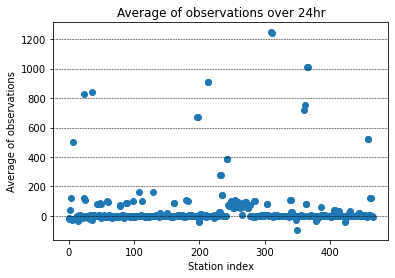

In [ ]:
def diff_comp_all_stations():
  meanlist = []
  for i in range(len(stationlist)):
    x,w = difference(i)
    meandiff = np.mean(x)
    meanlist.append(meandiff)
  
  hh = []
  errorlist =[]
  for idx,ele in enumerate(meanlist):
    if str(ele) != 'nan':
      hh.append(ele)
    else:
      errorlist.append(idx)
  print(np.mean(hh))
  print(hh)
  print(len(hh))
  allmean = np.mean(hh)
  allstddeve = np.std(hh)
  median = np.median(hh)
  numobs = len(stationlist)-len(errorlist)
  #print(numobs)
  #print('station indexes not included due to nan error',errorlist)
  #print(allmean)
  datadict = {'index':[1],
              'number of observations':numobs,
              'mean ':allmean,
              'std deviation':allstddeve,
              'median ':median,
              'Max ':np.max(hh),
              'Min ':np.min(hh)
              }
  numlist = [i for i in range(len(stationlist)-len(errorlist))]
  df2 = pd.DataFrame(datadict)
  display(df2)
  fig,ax = plt.subplots()
  plt.title('Average of observations over 24hr')
  plt.xlabel('Station index')
  plt.ylabel('Average of observations')
  plt.grid(axis = 'y',color = 'black', linestyle = '--', linewidth = 0.5)
  plt.scatter(numlist,hh)
  return allmean
diff_comp_all_stations()
w,r = difference(0)
print(np.mean(w))

In [ ]:
# plots interpolated values, actual station values, and the difference 
#between the two at each hour
def vsplot(x):
  try:
    #x = namesearchfun() 
    #print(x)
    diff,timeaxis = difference(x)
    
    inter_points = [wrfdataint_hourly[i][x]for i in timeaxis]
    
    timlist,pmconlist = hrly_time_pmcon(x)
  
    
    timeadj = [str(ele)for ele in timeaxis]
    

    
    fig, ax = plt.subplots()
    plt.title('WRF Pm2.5 concentration interpolated to station location for station:'+stationlist[x].name)
    plt.grid(axis = 'y',color = 'black', linestyle = '--', linewidth = 0.5)
    plt.xlabel('Hours')
    plt.ylabel('Pm2.5 concentration $(µg/m^3$)')
    plt.plot(timlist,inter_points,'o-',c ='indigo',label ="Pm2.5 concentrations")
    plt.legend(loc ='upper right')

    fignew, ax = plt.subplots()
    plt.title('Interpolated PM values vs station values'+stationlist[x].name)
    plt.grid(axis = 'y',color = 'black', linestyle = '--', linewidth = 0.5)
    plt.xlabel('Time')
    plt.ylabel('Pm2.5 concentration $(µg/m^3$)')
    plt.plot(timlist,inter_points,'o-',c = 'indigo',label = 'interpolated values')
    plt.plot(timlist,pmconlist,'x-',c ='green',label ='Station data values')
    plt.legend(loc ='upper right')

    '''fig2, ax = plt.subplots()
    plt.title(stationlist[x].name + ' Station PM values')
    plt.xlabel('time')
    plt.ylabel('Pm2.5 concentration $(µg/m^3$)')
    plt.plot(timlist, pmconlist)'''
    
    fig3, ax = plt.subplots()
    plt.title('differences '+stationlist[x].name)
    plt.grid(axis = 'y',color = 'black', linestyle = '--', linewidth = 0.5)
    plt.xlabel('time')
    plt.ylabel('difference in Pm2.5 concentration $(µg/m^3$)')
    plt.plot(timeadj,diff,'o-',c = 'red',label = 'Difference of pm2.5 values')
    plt.plot(5,np.mean(diff),'x-',c = 'black',label = 'mean Difference of pm2.5 values')
    plt.legend(loc ='upper right')
  except:
    return

### 3.6.2 Preparing plots and combining functions for ease of use

In [ ]:
#includes adjust pm concentrations with basic stats, data table, and plots
def general_stn_data(stnidx):
  d,p,l = pmcon_adj(stnidx)
  station_stats(stnidx)
  allpm_dt(stnidx)
  x,y = hrly_time_pmcon(stnidx)
 


  plt.boxplot(d) # box plot only using the variable pm 2.5 concentration 
  plt.title('Box Plot of pm2.5 concentration '+stationlist[stnidx].name)
  plt.ylabel('pm2.5 concentration$(µg/m^3$)')
  plt.xlabel('station')

  fig2, ax = plt.subplots()
  plt.title(stationlist[stnidx].name+' pm2.5 concentration$(µg/m^3$)')
  plt.grid(axis = 'y',color = 'black', linestyle = '--', linewidth = 0.5)
  plt.ylabel('pm2.5 concentration$(µg/m^3$)')
  plt.xlabel('datetime index')
  plt.plot(d,'o-',c ='green',label ='Station observations')
  #plt.plot(y,'x-',c ='black',label ='Station obs')
  
  plt.legend(loc ='upper right')


In [ ]:
# provides all analysis so far in plots and data tables
def alldata_summary():
  x = namesearchfun()
  print()
  general_stn_data(x)
  print()
  pm_comparison_dt(x)
  print()
  vsplot(x)


station name Traverse Mountain 2
Number of observations before adjustment 139
Number of pm observations after adjusting for missing data  139

Numerical summary
Pm Concentration mean = 3.87
Max pm concentration 17.63
Minimum pm concentration 0.16
Pm2.5 observations standard deviation 3.45
Pm2.5 observations median 2.98


,index,station name,station index,# observations before adjustment,# observations after adjustment,mean,std deviation,median,max,min
0,0,Traverse Mountain 2,167,139,139,3.87,3.45,2.98,17.63,0.16


Data Table for Station:  Traverse Mountain 2 all pm2.5 concentrations available


,all time,all pmcon
0,2018-09-16T00:00:00Z,6.52
1,2018-09-16T00:10:00Z,8.49
2,2018-09-16T00:20:00Z,5.56
3,2018-09-16T00:30:00Z,8.78
4,2018-09-16T00:40:00Z,5.28
...,...,...
134,2018-09-16T22:20:00Z,0.24
135,2018-09-16T22:30:00Z,0.29
136,2018-09-16T22:40:00Z,0.43
137,2018-09-16T22:50:00Z,0.27


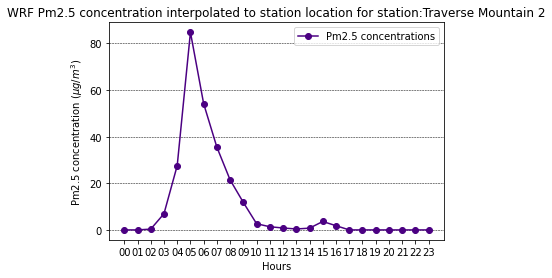

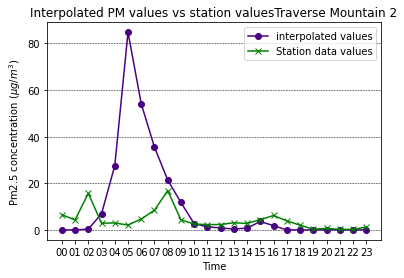

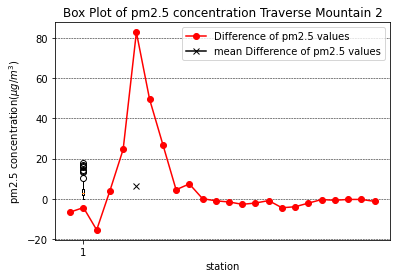

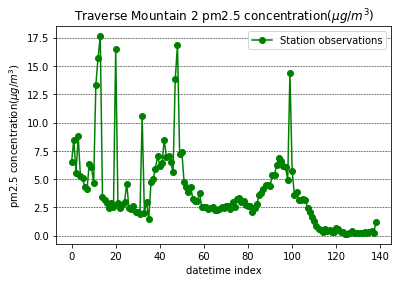

In [ ]:
vsplot(167)
general_stn_data(167)

#4 Results

### All data summary
A look into possible comparisons that can be done with this notebook.
Provides numerical and grahpical summary about pm concentrations for both WRF and MesoWest station observations as well as a comparison

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]
# alldata_summary()
# enter a station name to test, Lindon, Roosevelt, Hawthorne

station name Orem Lakeridge Junior High B
Number of observations before adjustment 139
Number of pm observations after adjusting for missing data  139

Numerical summary
Pm Concentration mean = 3.92
Max pm concentration 11.24
Minimum pm concentration 1.66
Pm2.5 observations standard deviation 2.02
Pm2.5 observations median 3.11


,index,station name,station index,# observations before adjustment,# observations after adjustment,mean,std deviation,median,max,min
0,0,Orem Lakeridge Junior High B,267,139,139,3.92,2.02,3.11,11.24,1.66


Data Table for Station:  Orem Lakeridge Junior High B all pm2.5 concentrations available


,all time,all pmcon
0,2018-09-16T00:00:00Z,3.36
1,2018-09-16T00:10:00Z,3.31
2,2018-09-16T00:20:00Z,2.84
3,2018-09-16T00:30:00Z,3.12
4,2018-09-16T00:40:00Z,2.91
...,...,...
134,2018-09-16T22:20:00Z,2.14
135,2018-09-16T22:30:00Z,2.11
136,2018-09-16T22:40:00Z,2.19
137,2018-09-16T22:50:00Z,1.66



Data Table for Station:  Orem Lakeridge Junior High B with interpolated and station pm concentrations


,time,hourly pmconcentration,hourly WRF interpolated value,difference
0,00,3.36,0.76,-2.600509
1,01,3.46,34.59,31.134633
2,02,2.79,180.06,177.267110
3,03,2.56,258.39,255.826856
4,04,3.33,412.17,408.840814
5,05,3.04,383.62,380.576259
6,06,11.24,307.87,296.627089
7,07,3.23,262.90,259.668208
8,08,2.21,170.53,168.319064
9,09,3.09,52.03,48.943706


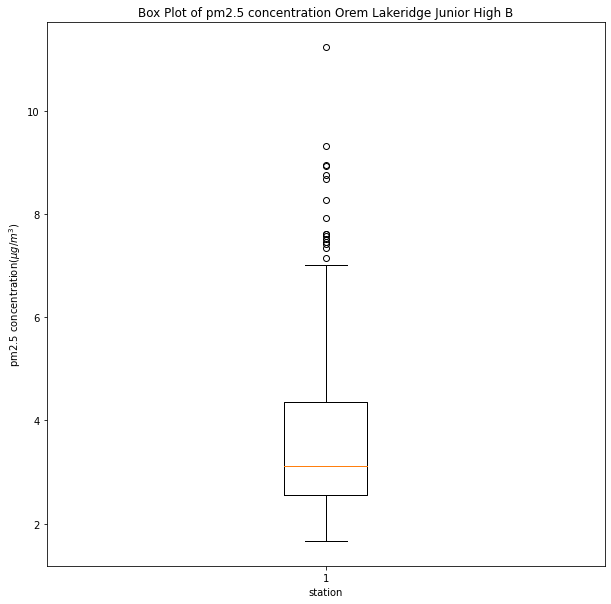

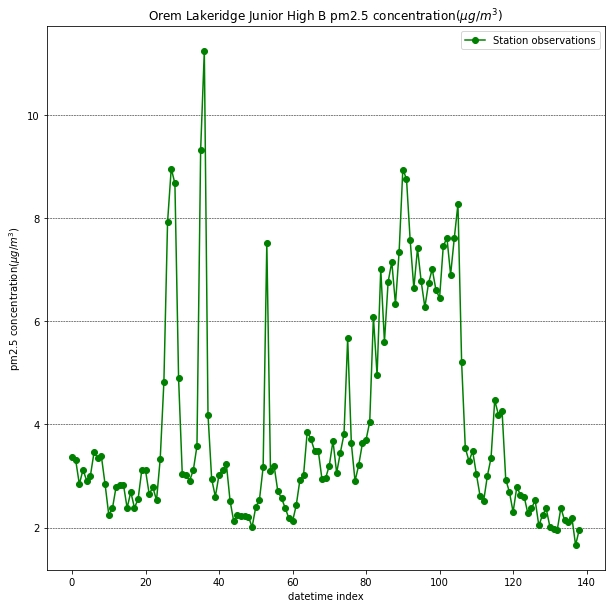

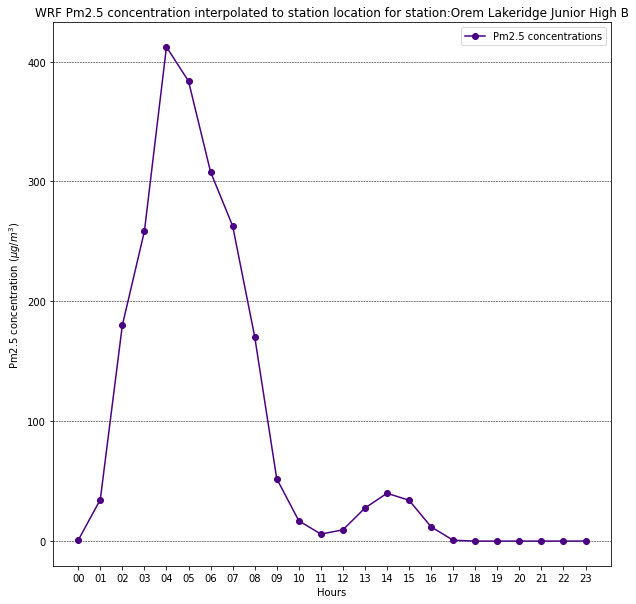

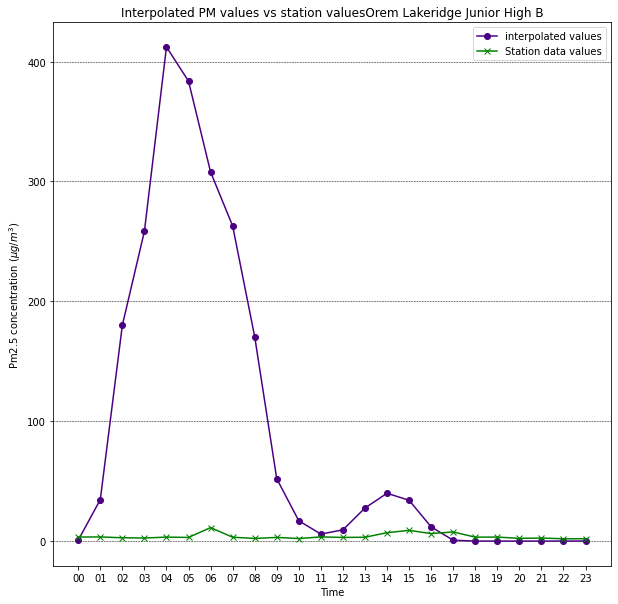

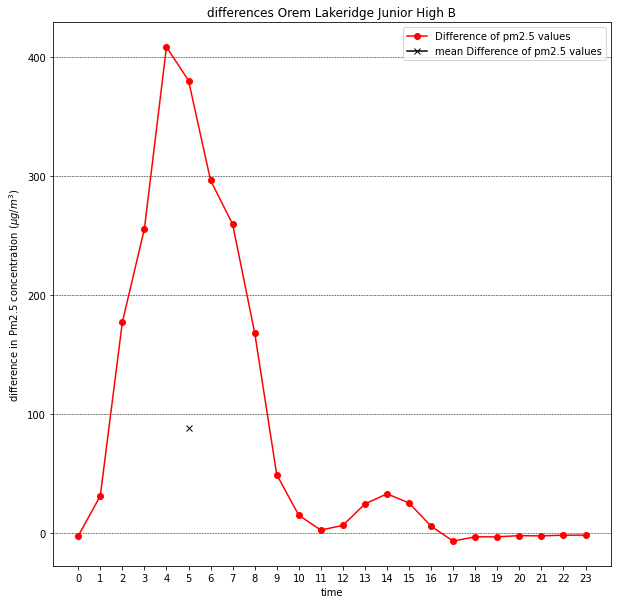

In [ ]:
#sample output
general_stn_data(267)
print()
pm_comparison_dt(267)
print()
vsplot(267)
#summed all into one function above

station name Historic Downtown
Number of observations before adjustment 139
Number of pm observations after adjusting for missing data  139

Numerical summary
Pm Concentration mean = 2.2
Max pm concentration 6.55
Minimum pm concentration 0.54
Pm2.5 observations standard deviation 0.94
Pm2.5 observations median 2.13


,index,station name,station index,# observations before adjustment,# observations after adjustment,mean,std deviation,median,max,min
0,0,Historic Downtown,197,139,139,2.2,0.94,2.13,6.55,0.54


Data Table for Station:  Historic Downtown all pm2.5 concentrations available


,all time,all pmcon
0,2018-09-16T00:00:00Z,3.26
1,2018-09-16T00:10:00Z,3.96
2,2018-09-16T00:20:00Z,3.50
3,2018-09-16T00:30:00Z,3.77
4,2018-09-16T00:40:00Z,3.76
...,...,...
134,2018-09-16T22:20:00Z,1.32
135,2018-09-16T22:30:00Z,1.58
136,2018-09-16T22:40:00Z,1.48
137,2018-09-16T22:50:00Z,1.92



Data Table for Station:  Historic Downtown with interpolated and station pm concentrations


,time,hourly pmconcentration,hourly WRF interpolated value,difference
0,00,3.26,684.24,680.980102
1,01,3.65,1454.61,1450.960201
2,02,3.51,1496.57,1493.058639
3,03,2.85,851.74,848.891952
4,04,2.38,788.74,786.360080
5,05,1.90,901.51,899.608881
6,06,1.74,728.00,726.261541
7,07,1.75,823.31,821.562228
8,08,2.04,808.84,806.799481
9,09,2.23,638.38,636.146686


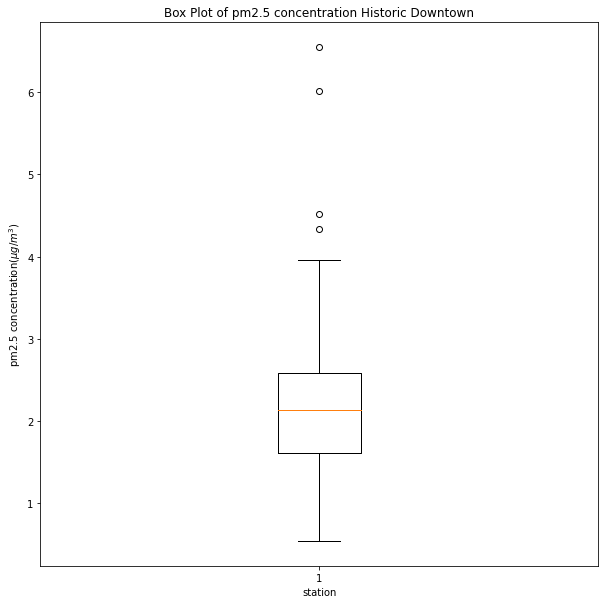

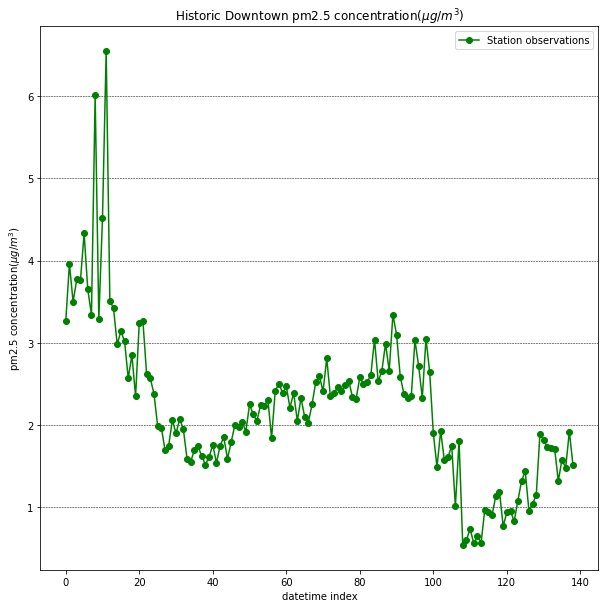

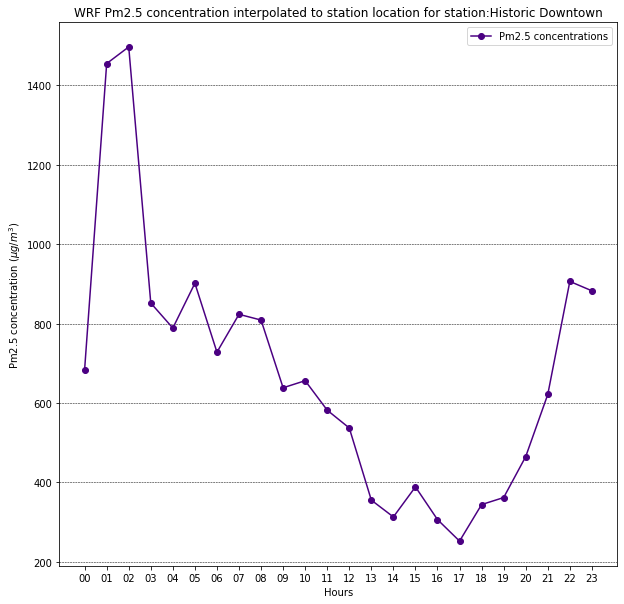

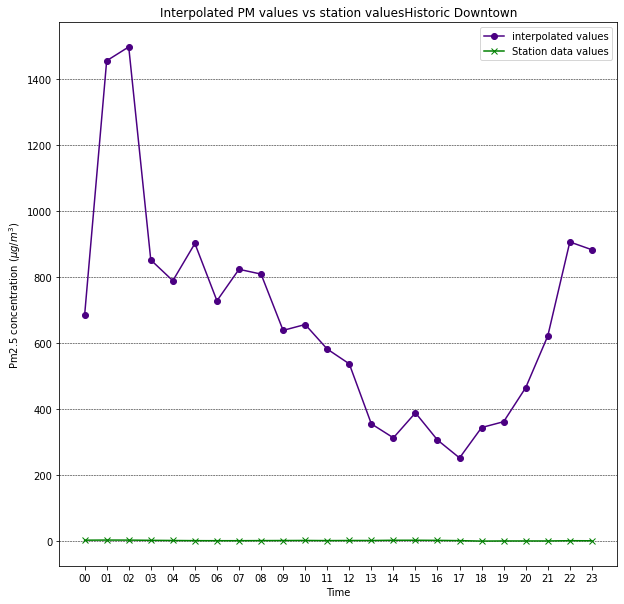

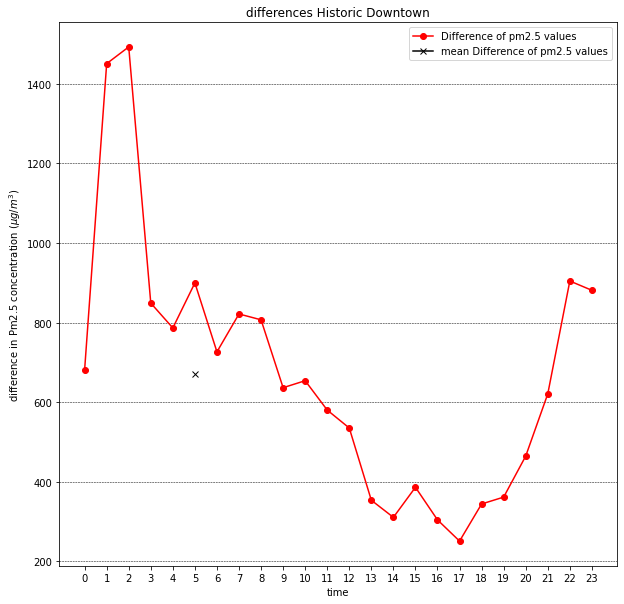

In [ ]:
#sample output
general_stn_data(197)
print()
pm_comparison_dt(197)
print()
vsplot(197)

##4.1 Comparing Time and $PM_{2.5}$ in Station

We are interested in  $R^2$  values to see how well the polynomial regression fits in the data.In this case,  $R^2$  measures the degree of association between time and pm2.5 concentration. Values close to 1 means a strong relationship between time and pm 2.5 concentration. Values close to 0 means a weak relationship.

### 4.1**.1** Ogden Station

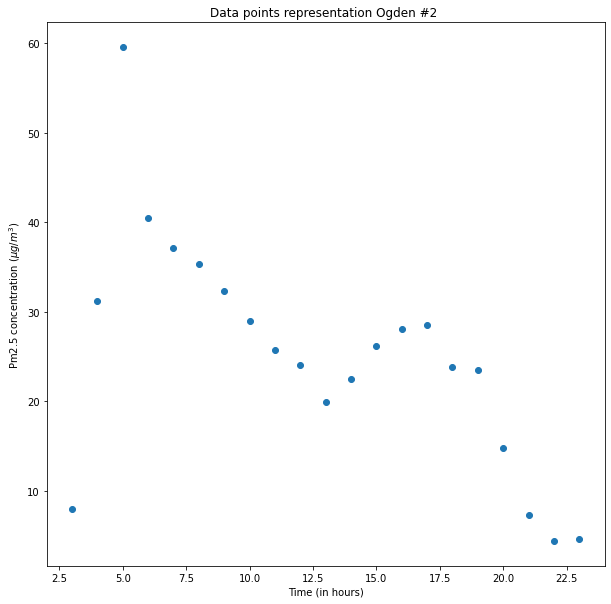

Mean:  25.071428571428573
Variance:  162.23823129251704
Standard Deviation:  12.737277232301928
Median:  25.7


In [ ]:
#time values 
x2 = [3, 4, 5, 6, 7, 8, 9,10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23] 

#pm concentration values 
y2 = [8.0, 31.2, 59.6, 40.5, 37.1, 35.4, 32.3, 29.0, 25.7, 24.1, 19.9, 22.5, 
      26.2, 28.1, 28.5, 23.8, 23.5, 14.8, 7.3, 4.4, 4.6] 

plt.scatter(x2, y2) #plots the data points 
plt.title("Data points representation Ogden #2 ")
plt.xlabel('Time (in hours)')
plt.ylabel('Pm2.5 concentration $(µg/m^3$)')
plt.show()

compareWRFtoStation_statistics(y2)

Text(0, 0.5, 'pm2.5 concentration$(µg/m^3$)')

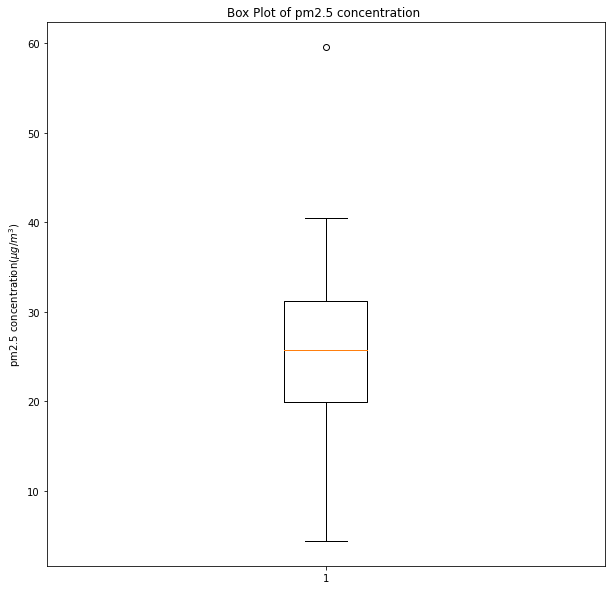

In [ ]:
plt.boxplot(y2) # box plot only using the variable pm 2.5 concentration 
plt.title('Box Plot of pm2.5 concentration ')

plt.ylabel('pm2.5 concentration$(µg/m^3$)')

This box plot shows the median concentration value, which is 25.7  µg/m3 . The box plot is symmetrically distributed as the median concentration is at the center of the box. We can also observe an outlier, which is approximately 60  µg/m3 , which is consistent with the graphs above.


Based on the measures of variability in our data (the variance and standard deviation), we see that there are pm 2.5 concentration values very far away from the mean concentration values, which shows the consistency of graph above, and the use of a polynomial regression of a higher degree (9) to fit most of the data points.

In [ ]:
polymodel = np.poly1d(np.polyfit(x2, y2, 9)) #creates the polynomial line 

print(r2_score(y2, polymodel(x2)))
print(polymodel)

0.9271085758502825
            9             8            7           6        5         4
-4.815e-07 x + 5.532e-05 x - 0.002705 x + 0.07345 x - 1.21 x + 12.38 x
          3         2
 - 77.16 x + 271.5 x - 449.8 x + 238.9


In [ ]:
from sklearn.metrics import r2_score
polymodel = np.poly1d(np.polyfit(x2, y2, 9)) #creates the polynomial line 

print(r2_score(y2, polymodel(x2))) # measures the degree of association between x2 and y2.

0.9271085758502825




For the Ogden Staion, the value of  $R^2$  is approximately 0.9271, which means there is a strong relationship between the time and pm2.5 concentration; thus ,a polynomial regression can be used to make predictions.

###4.1.2 Boundiful Viewmont Station 


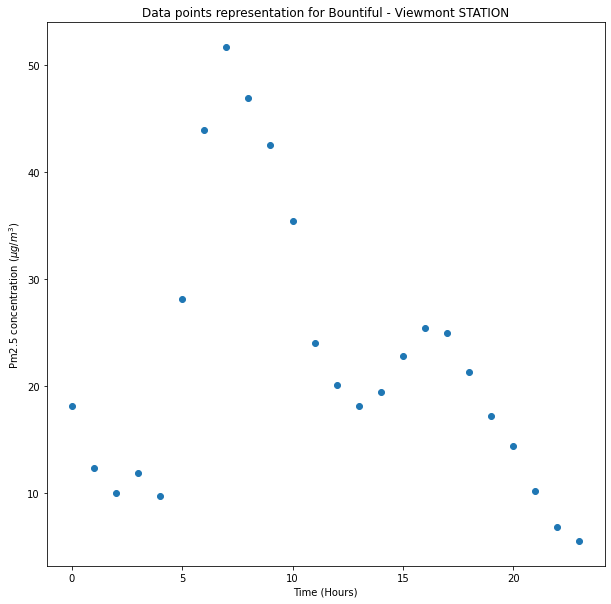

Mean:  22.52916666666667
Variance:  162.21706597222223
Standard Deviation:  12.736446363574975
Median:  19.75


In [ ]:
x3= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23] #time values 
y3 = [18.1, 12.3, 10.0, 11.9, 9.7, 28.1, 43.9, 51.7, 46.9, 42.5, 35.4, 24.0, 20.1, 18.1, 19.4, 22.8, 25.4, 25.0, 21.3, 17.2, 14.4, 10.2, 6.8, 5.5]
 #pm concentration values 
plt.title("Data points representation for Bountiful - Viewmont STATION")
plt.xlabel('Time (Hours)')
plt.ylabel('Pm2.5 concentration ($µg/m^3$)')
plt.scatter(x3, y3) #plots the data points 
plt.show()

compareWRFtoStation_statistics(y3)

Text(0, 0.5, 'pm2.5 concentration$(µg/m^3$)')

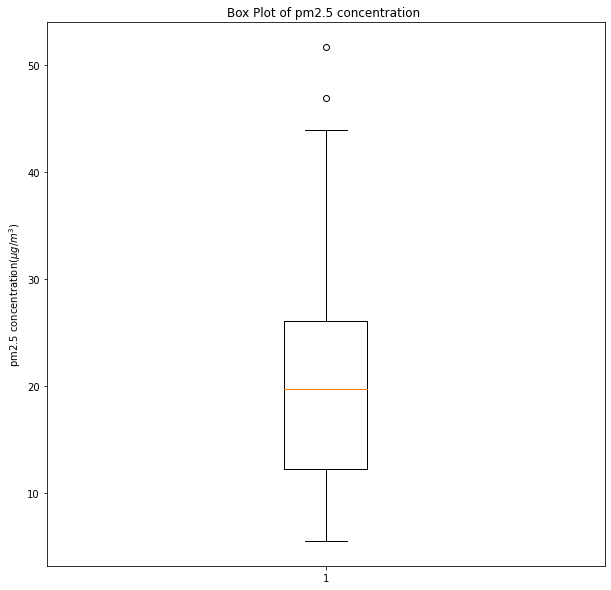

In [ ]:
plt.boxplot(y3)
plt.title('Box Plot of pm2.5 concentration ')

plt.ylabel('pm2.5 concentration$(µg/m^3$)')

This box plot shows the median concentration value, which is 19.75  µg/m3.
We can also observe two outliers for values higher tham 40  µg/m3 , which is consistent with the graphs above.

In [ ]:
polymodel1 = np.poly1d(np.polyfit(x3, y3, 9)) #creates the polynomial line 

print(r2_score(y3, polymodel1(x3))) # measures the degree of association between x3 and y3.

0.9678603660274603


Since the value of  $R^2 $ is approximately 0.96786, it means there is a strong relationship between the time and pm2.5 concentration;thus,a polynomial regression can be used to make predictions.

###4.1.3 U of U William Browning Building Station

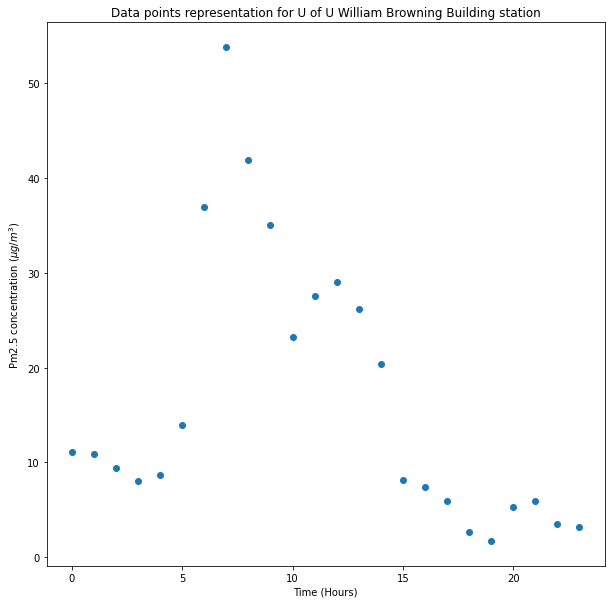

Mean:  16.66875
Variance:  198.0922109375
Standard Deviation:  14.074523471062884
Median:  10.165


In [ ]:
x4 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23] #time values 
y4 = [11.08, 10.89, 9.44, 8.04, 8.68, 13.95, 36.99, 53.86, 41.96, 35.11, 23.25, 27.54, 29.02, 26.21, 20.41, 8.12, 7.36, 5.97, 2.65, 1.69, 5.27, 5.87, 3.48, 3.21]
 #pm concentration values 
plt.title("Data points representation for U of U William Browning Building station")
plt.xlabel('Time (Hours)')
plt.ylabel('Pm2.5 concentration ($µg/m^3$)')
plt.scatter(x4, y4) #plots the data points 
plt.show()

compareWRFtoStation_statistics(y4)

Text(0, 0.5, 'pm2.5 concentration$(µg/m^3$)')

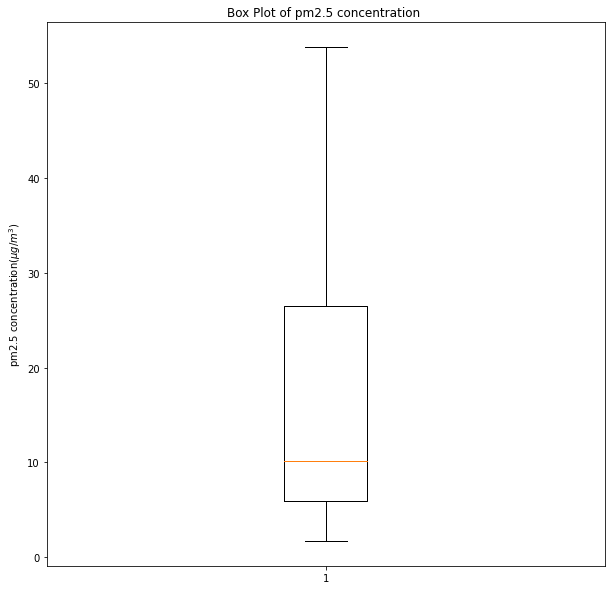

In [ ]:
plt.boxplot(y4)
plt.title('Box Plot of pm2.5 concentration ')

plt.ylabel('pm2.5 concentration$(µg/m^3$)')

This box plot shows the median concentration value, which is 10.165  µg/m3 .
There are no outliers in the box plot, which means more accuracy in the data.

In [ ]:
polymodel1 = np.poly1d(np.polyfit(x4, y4, 9)) #creates the polynomial line 

print(r2_score(y4, polymodel1(x4))) # measures the degree of association between x4 and y4.

0.8860091412097689


Since the value of  $R^2$  is approximately 0.886, it means there is a strong relationship between the time and pm2.5 concentration;thus,a polynomial regression can be used to make predictions.

##4.2 Comparing Time and $PM_{2.5}$ in WRF

[2.4406770e-03 1.3999490e-02 7.6069003e-01 1.1340757e+01 2.1083521e+01
 2.2198593e+01 9.9423847e+00 8.5867062e+00 7.8240938e+00 1.3313655e+01
 2.1433155e+01 2.3607189e+01 2.4410635e+01 2.5235979e+01 2.5443422e+01
 1.7642891e+01 8.7599754e+00 5.8885703e+00 1.2039571e+01 1.3501454e+01
 2.8224535e+01 1.0221753e+01 6.9432306e+00 6.4093256e+00]


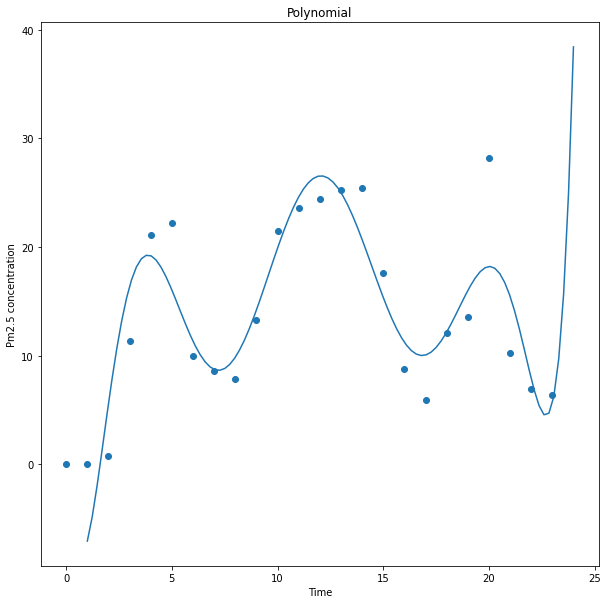

Mean:  13.534522
Variance:  71.59332
Standard Deviation:  8.461284
Median:  11.690165


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:748: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [ ]:
 # Wrf time values and pm2.5 concentration fit to a polynomial 
inter_points11 =  file.variables['tr17_1'][:,0,60,60]
print(inter_points11)
x2 = [0,1,2,3, 4, 5, 6, 7, 8, 9,10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
polymodel = np.poly1d(np.polyfit(x2, inter_points11, 8))
polyline = np.linspace(1, 24, 100)
plt.scatter(x2,inter_points11)
plt.plot(polyline, polymodel(polyline))
plt.title("Polynomial")
plt.xlabel('Time')
plt.ylabel('Pm2.5 concentration')
plt.show()

compareWRFtoStation_statistics(inter_points11)

In [ ]:
#creates the polynomial line 
polymodel1 = np.poly1d(np.polyfit(x2, inter_points11, 9)) 

# measures the degree of association between time and pm2.5 concentration
print(r2_score(inter_points11, polymodel1(x2))) 

0.8638879092557322


Text(0, 0.5, 'pm2.5 concentration$(µg/m^3$)')

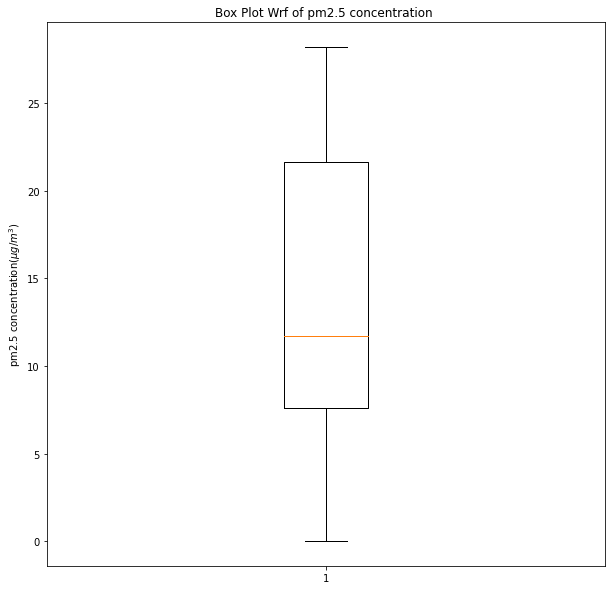

In [ ]:
plt.boxplot(inter_points11)
plt.title('Box Plot Wrf of pm2.5 concentration ')

plt.ylabel('pm2.5 concentration$(µg/m^3$)')

This box plot shows the median concentration value, which is approximately 
11.69  µg/m3 .There are no outliers in the box plot, which suggests more accuracy and consistency of the data.

#Conclusion

We considered a degree nine polynomial for all the stations and WRF to predict how well the polynomial fits in the data. We are interested in $R^2$ values to see how well the polynomial regression fits in the data and the accuracy of our prediction. When comparing the statistics for three stations and WRF, we can observe that overall the $R^2$ results are much higher for the stations than for WRF. Hence, the polynomial regression fits better the data for the stations than for WRF since it has the strongest relationship between the time and pm2.5 concentration.


\\

According to the graphs that compare WRF to the weather stations, the interpolated values of WRF against the concentration show more variability (see the peaks of the graphs), which tends to underestimate the data in comparison to the data point or the number of observations we have. This may be due to estimation errors and it may lead to misinterpretations of the data. There is no such perfect model when predicting weather observations data. However, based on our results, the weather stations seem to have better management and accuracy of the data compared to WRF data.

Due to the numerous variables that WRF forecasts and stations obtain data on this notebook could be altered or scaled to include variables of the users choice. Gathering numerous variables together would allow for much stronger analysis to be done. It would provide insight to the relationship between other variables as well what errors occur together. 

Interpretaion of results can be broken down by station or the average difference between a WRF forecast and a station observation for every obsersavtion over the whole region. 


## Contributions of authors 

All the authors contributed to the code of this notebook for the Methods and Results sections. Every author contributed in many ways across the notebook and a large amount of collaboration was needed for this project.

A brief outline of the focus of some memebers, includes much more than this,

Conceptulization was in large part due to the help of our professor, and many following classes spent asking and learning possible ways to complete the notebook.

All memembers have a strong understanding of all aspects of the notebook and all contributed to the code base for this project.

Julianna reserached and tested different methods of interpolation. Helped with project administration and keeping the group organized. 

Dianelys researched and wrote code for the results and summary.

Nick focused on architecture and cleaing of the data.

Nicholas wrote the Abstract and Background sections, Julianna the Introduction and Table of contents, and Dianelys wrote the Conclusion and References.

All spent a large amount of time debugging code and attempting to improve software. Spent time drastically improving python skills for this notebook. 

Everyone helped with the Contributions of authors and Acknowledgments sections as well as editing the entire notebook, which contributed to the project's success.

All authors have reviewed and approve the submission of this project

## Acknowledgements

This Math Clinic project is sponsored by the team of investigators of the NASA grant no. 80NSSC19K1091 *Coupled Interactive Forecasting of Weather, Fire Behavior, and Smoke Impact for Improved Wildland Fire Decision Making* under the NASA ROSES18 Disasters program. The authors would like to thank professor Jan Mandel and the investigators who contributed to the project's success by providing helpful documentation. 

##5.3 References 

 How to use¶. (n.d.). Retrieved December 07, 2021, from https://wrf-python. readthedocs.io/en/latest/basic_usage.html#lat-lon-xy-routines
 
 Https://colab.research.google.com/drive/18e2hh-XpGYJLj8zyo1kBhS3B1a88jdTh?usp=sharing#scrollTo=HE-r6GlnjWY7. (n.d.).



Incorporating a Canopy Parameterization within a Coupled Fire-Atmosphere Model to Improve a Smoke Simulation for a Prescribed Burn. (n.d.). Retrieved December 7, 2021, from doi:10.3390/atmos11080832



Kochanski, A. K., Beezley, J. D., Mandel, J., & Clement, C. B. (n.d.). Air pollution predictionby couplingatmosphere-fire modelsWRF and SFIREwith WRF-Chem. Retrieved February, 2013.



Kochanski, A., Jenkins, M., Yedinak, K., Mandel, J., Beezley, J., & Lamb, B. (2015, May 11). Toward an integrated system for fire, smoke and air quality simulations. December 07, 2021, http://dx.doi.org/10.1071/WF14074



Krč, P. (n.d.). Http://www.pkrc.net/wrf-lambert.html. Retrieved December 07, 2021, from http://www.pkrc.net/wrf-lambert.html



Linear interpolation¶. (n.d.). Retrieved December 07, 2021, from https://matthew-brett.github.io/teaching/linear_interpolation.html



Mallia, D. V., Kochanski, A. K.,Kelly, K. E., Whitaker, R., Xing, W.,Mitchell, L. E., et al. (2020). Evaluatingwildfire smoke transport within acoupledfire‐atmosphere model using ahigh‐density observation network foran episodic smoke event along Utah'sWasatch Front.Journal of GeophysicalResearch: Atmospheres,125,e2020JD032712. https://doi.org/10.1029/2020JD032712. (n.d.).




MesoWest Data. (n.d.). Retrieved December 07, 2021, from https://mesowest.utah.edu/



Table of available diagnostics¶. (n.d.). Retrieved December 07, 2021, from https://wrf-python.readthedocs.io/en/latest/diagnostics.html




Weather Research & Forecasting Model. ARW Version 4 Modeling System User’s Guide. (n.d.). Retrieved January, 2019.